In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [45]:
df = pd.read_csv("insurance_data.csv")
df.head(),df.shape

(   age  affordibility  bought_insurance
 0   22              1                 0
 1   25              0                 0
 2   47              1                 1
 3   52              0                 0
 4   46              1                 1,
 (28, 3))

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

In [39]:
def sigmoid_numpy(X):
    return 1/(1+np.exp(-X))



In [40]:
import numpy as np

# Generate an array of 20 random integers between 0 and 9 (inclusive)
random_integers = np.random.randint(0,len(X_train_scaled), 20)

print(random_integers)


[ 6  6  4  6 19 19 20  1 19 14  8 16  8  9 18 19  4  6 12  9]


In [41]:
#X_train_scaled['affordibility'].iloc[random_integers].head()

In [42]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [119]:
def gradient_descent(r_age, r_affordability, r_y_true, epochs, loss_thresold,sample_size):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(r_age)
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        # Generate an array of 20 random integers between 0 and 9 (inclusive)
        random_integers = np.random.randint(0,len(r_age), sample_size)
        age=r_age.iloc[random_integers]
        affordability=r_affordability.iloc[random_integers]
        y_true=r_y_true.iloc[random_integers]
    
    
        
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
        if i%1==0: # at every nth iteration record the cost and epoch value (increase n when data is big)
            cost_list.append(loss)
            epoch_list.append(i)

        if loss<=loss_thresold:
            break

    return w1, w2, bias,epoch_list,cost_list

In [120]:
#gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000, 0.1,5)

In [125]:
w_mb, b_mb, cost_mb, cost_list_mb, epoch_list_mb = gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000,0.35,5)

Epoch:0, w1:0.987712163449021, w2:0.9858394238733554, bias:-0.145804592299715, loss:0.8255323441699141
Epoch:1, w1:0.9903377504951429, w2:1.0045060338083682, bias:-0.12276437457342733, loss:0.36280071861027
Epoch:2, w1:0.990494282423216, w2:1.0139585298686484, bias:-0.14200083129925933, loss:0.5291540418576011
Epoch:3, w1:0.9879652442992718, w2:0.984385355835171, bias:-0.28587940612246426, loss:0.8413987845182145
Epoch:4, w1:0.9793101802562838, w2:0.9726058206956033, bias:-0.3857808705174784, loss:0.756824211929528
Epoch:5, w1:0.9754838118190503, w2:0.9624342966965812, bias:-0.48610392188338825, loss:0.6916283591787358
Epoch:6, w1:0.9749865303310836, w2:0.9581410123697973, bias:-0.49390505808524715, loss:0.6578471638563241
Epoch:7, w1:0.9855377287987322, w2:0.9639511290557223, bias:-0.3585002379239559, loss:0.6591294830000816
Epoch:8, w1:0.9835486476553972, w2:0.9599542764923407, bias:-0.37786222526876123, loss:0.6654169275580734
Epoch:9, w1:0.9920255654884862, w2:0.9773748145116381, b

Epoch:89, w1:1.284417000649231, w2:1.1485414453090521, bias:-1.0567734612956496, loss:0.4967315022346338
Epoch:90, w1:1.279794040920233, w2:1.1289473059666246, bias:-1.2061136790928184, loss:0.5791327071833403
Epoch:91, w1:1.2810406334426083, w2:1.1205849187446428, bias:-1.2731676326171537, loss:0.5661274885053007
Epoch:92, w1:1.2840962237040345, w2:1.1053816613404273, bias:-1.3129831025809495, loss:0.6870327973659617
Epoch:93, w1:1.3016124952605308, w2:1.1306701852034997, bias:-1.1543253664735336, loss:0.5986663948032863
Epoch:94, w1:1.313896312338461, w2:1.1332740364475948, bias:-1.1124024332551765, loss:0.5778858280887365
Epoch:95, w1:1.2880711193130143, w2:1.0905536394790896, bias:-1.3792367856213879, loss:0.7941265890760297
Epoch:96, w1:1.2808650210684196, w2:1.0880900849079411, bias:-1.482664640932692, loss:0.4616425538363855
Epoch:97, w1:1.2876800149170846, w2:1.0950415392665696, bias:-1.452078241754727, loss:0.6346773680894031
Epoch:98, w1:1.2931751144757457, w2:1.0826134801517

Epoch:171, w1:1.5578894071227367, w2:1.1447239574038997, bias:-1.5875119095226067, loss:0.8125230352337371
Epoch:172, w1:1.5567829853924426, w2:1.1410890566745258, bias:-1.6266878879175772, loss:0.5855092919536077
Epoch:173, w1:1.5612026910213233, w2:1.138982606935676, bias:-1.6589909032009014, loss:0.5103059393105515
Epoch:174, w1:1.572309285478286, w2:1.1581238178830027, bias:-1.5978062389640315, loss:0.5145036372835496
Epoch:175, w1:1.591630679000636, w2:1.192964677532193, bias:-1.4659386566342971, loss:0.4350802978418836
Epoch:176, w1:1.5957374930955361, w2:1.1810724395392087, bias:-1.4425679472122113, loss:0.7642811761350553
Epoch:177, w1:1.5961551121579183, w2:1.1977730418981187, bias:-1.4592838844466718, loss:0.3991667694557606
Epoch:178, w1:1.5895989132672874, w2:1.182004249003607, bias:-1.5903988842758496, loss:0.5274458982449135
Epoch:179, w1:1.5894537667837416, w2:1.1775001614941765, bias:-1.609424353477032, loss:0.6380296686244152
Epoch:180, w1:1.584424764196976, w2:1.16547

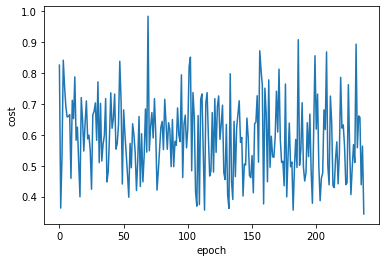

In [126]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(cost_list_mb, epoch_list_mb)